# Proyek Analisis Data: [Bike-sharing Dataset]
- **Nama:** Meicha Salsabila Budiyanti
- **Email:** meichabudianti@gmail.com
- **ID Dicoding:** MC229D5X1101

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan bulan?
- Bagaimana perbandingan penyewaan sepeda terbanyak dan tersedikit dalam setiap harinya?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda, baik untuk pengguna terdaftar (registered) maupun pengguna kasual (casual)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Peminjaman oleh pengguna terdaftar (registered) lebih tinggi dibandingkan pengguna casual, hari kerja mungkin memiliki jumlah peminjaman lebih banyak dibandingkan hari libur, faktor cuaca seperti suhu, kelembaban, dan kecepatan angin mungkin memengaruhi jumlah peminjaman.
- Peminjaman sepeda mungkin lebih tinggi pada jam berangkat kerja (pagi) dan pulang kerja (sore/malam), hari libur dan kerja kemungkinan memiliki pola peminjaman yang berbeda.

### Assessing Data

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Jumlah data pada day_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday yang harusnya direpresentasikan sebagai datetime bukan object.
- Jumlah data pada hour_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday yang harusnya direpresentasikan sebagai datetime bukan object.

In [4]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

day_df.describe() #Mengetahui apakah ada data yang terduplikat

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
#Melihat missing value
missing_values = day_df.isnull().sum()
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Cleaning Data

In [6]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Memperbaiki kesalahan dteday yang bertipe object diganti menjadi tipe datetime dengan menggunakan function to_datetime() dari library pandas. Kemudian memastikan kembali apakah sudah diperbaiki dengan memanggil kembali day_df.info()

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
print(day_df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [9]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [10]:
# Jumlah penyewa sepeda berdasarkan bulan
monthly_usage = day_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
display(monthly_usage)

<ipython-input-10-1bedeff65e65>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_usage = day_df.resample(rule='M', on='dteday').agg({


,cnt
dteday,
2011-01-31,38189
2011-02-28,48215
2011-03-31,64045
2011-04-30,94870
2011-05-31,135821
2011-06-30,143512
2011-07-31,141341
2011-08-31,136691
2011-09-30,127418


In [11]:
working_day = day_df.groupby(by='workingday').agg({
    "cnt": "mean",
    "registered": "mean",
    "casual": "mean"
})
display(working_day)

,cnt,registered,casual
workingday,,,
0,4330.168831,2959.034632,1371.134199
1,4584.820000,3978.250000,606.570000


In [12]:
#Pengelompokan jumlah penyewa sepeda berdasarkan hari
mapping_hari = {
    0: "Senin", 1: "Selasa", 2: "Rabu",
    3: "Kamis", 4: "Jumat", 5: "Sabtu", 6: "Minggu"
}

day_df["weekday"] = day_df["weekday"].map(mapping_hari)

weekday_usage = day_df.groupby("weekday")["cnt"].sum().sort_values(ascending=False).reset_index()
print(weekday_usage)

  weekday     cnt
0   Sabtu  487790
1   Jumat  485395
2  Minggu  477807
3   Kamis  473048
4    Rabu  469109
5  Selasa  455503
6   Senin  444027


In [13]:
# Melihat kelompok registered, casual, dan cnt berdasarkan cuaca
weather_mapping = {1:"Cerah", 2:"Berawan", 3:"Hujan ringan", 4:"Hujan lebat"}
day_df["weather_category"] = day_df["weathersit"].map(weather_mapping)

day_melted = day_df.groupby(by='weather_category').agg({
    "cnt": "sum",
    "registered": "sum",
    "casual": "sum"
}).reindex(["Cerah", "Berawan", "Hujan ringan", "Hujan lebat"]).fillna(0)
display(day_melted)

,cnt,registered,casual
weather_category,,,
Cerah,2257952.0,1811606.0,446346.0
Berawan,996858.0,827082.0,169776.0
Hujan ringan,37869.0,33974.0,3895.0
Hujan lebat,0.0,0.0,0.0


**Insight:**
- Pada data day_df memuat informasi bahwa :

  1. Kolom workingday bernilai 1 untuk hari kerja dan 0 untuk akhir pekan/libur.
  2. Rata-rata workingday sebesar 0.68 menunjukkan bahwa sebagian besar data merupakan hari kerja.
  3. Rata-rata jumlah penyewaan sepeda per hari adalah 4504, minimum jumlah penyewaan hanya 22 sepeda sedangkan maksimum mencapai 8714 sepeda.
  4. Nilai rata-rata 1.39 menunjukkan bahwa mayoritas hari memiliki kondisi cuaca baik atau cerah.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan bulan?

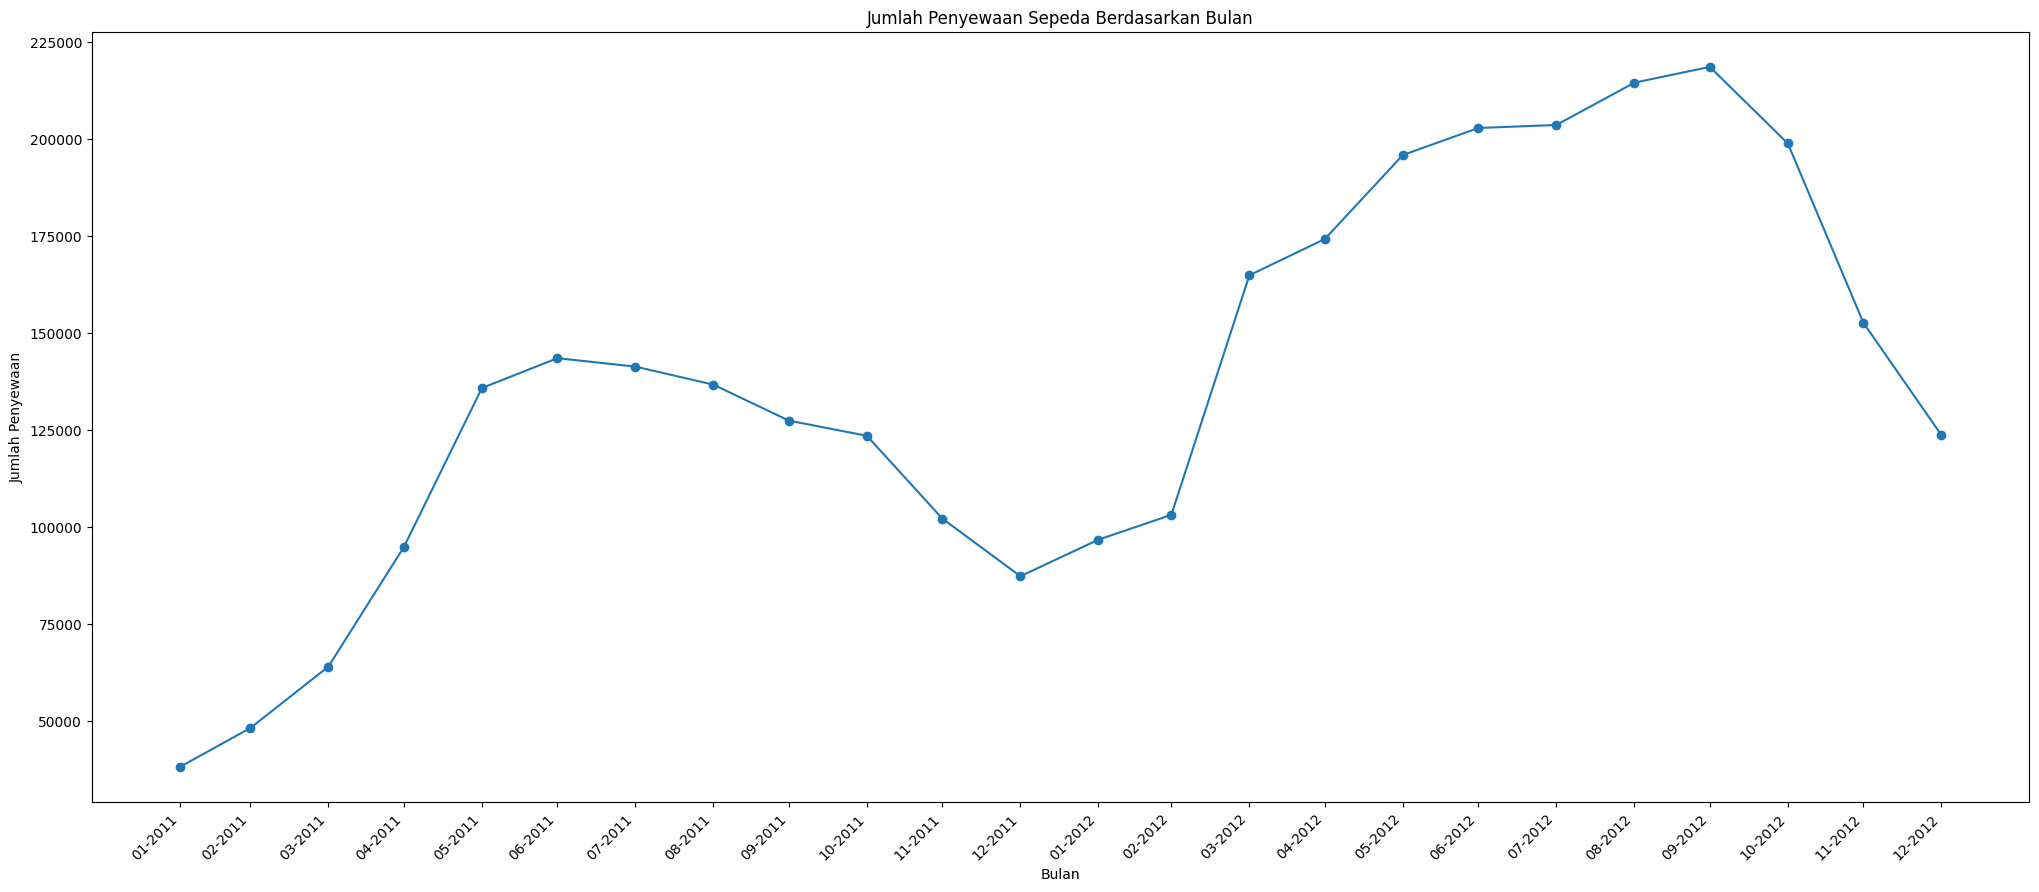

In [14]:
plt.figure(figsize=(25, 10))
plt.plot(monthly_usage.index, monthly_usage["cnt"], marker='o', linestyle='-')
month = monthly_usage.index.strftime('%m-%Y')
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.xticks(monthly_usage.index, month, rotation=45, ha='right')
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight:**
* Plot menunjukkan tren penyewaan sepeda yang bervariasi secara signifikan dari waktu ke waktu. Terdapat periode pertumbuhan yang kuat pada bulan September tahun 2012.

### 2. Bagaimana perbandingan penyewaan sepeda terbanyak dan tersedikit dalam setiap harinya?

<ipython-input-15-689aa53c6567>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="weekday", data=weekday_usage.head(7), palette=colors, ax=ax[0])
<ipython-input-15-689aa53c6567>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="weekday", data=weekday_usage.sort_values(by="cnt", ascending=True).head(7), palette=colors, ax=ax[1])


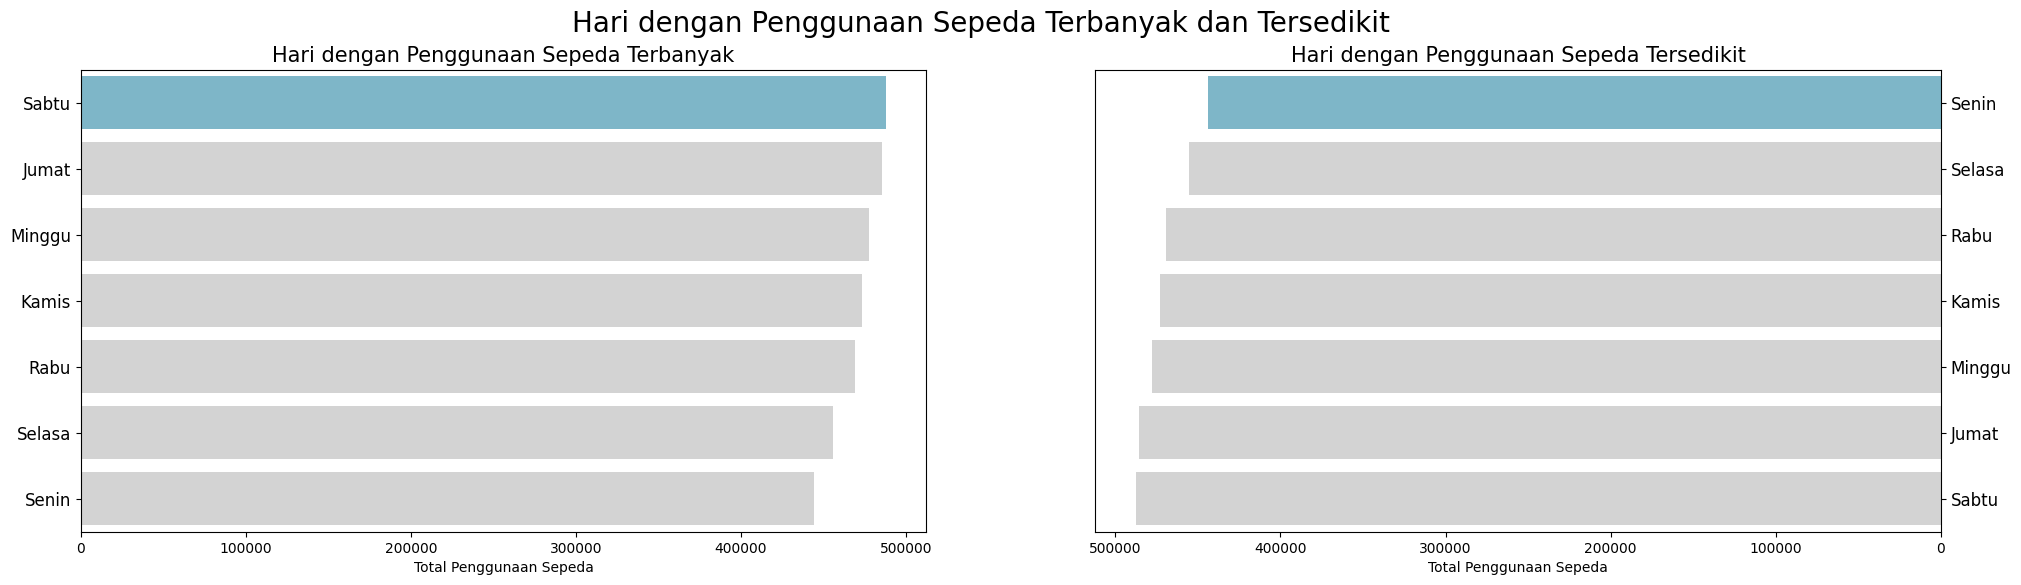

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3"]

# hari dengan penggunaan sepeda terbanyak
sns.barplot(x="cnt", y="weekday", data=weekday_usage.head(7), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Total Penggunaan Sepeda")
ax[0].set_title("Hari dengan Penggunaan Sepeda Terbanyak", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# hari dengan penggunaan sepeda tersedikit
sns.barplot(x="cnt", y="weekday", data=weekday_usage.sort_values(by="cnt", ascending=True).head(7), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Total Penggunaan Sepeda")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Hari dengan Penggunaan Sepeda Tersedikit", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Hari dengan Penggunaan Sepeda Terbanyak dan Tersedikit", fontsize=20)
plt.show()

**Insight:**

* Perbandingan penyewaan sepeda dilihat dalam grafik dimana hari dengan total penyewaan sepeda terbanyak adalah hari Sabtu sedangkan total penyewaan sepeda tersedikit adalah hari Senin.

#### Pertanyaan 3: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda, baik untuk pengguna terdaftar (registered) maupun pengguna kasual (casual)?

<ipython-input-16-50e49a7b27ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_melted.index, y=day_melted['cnt'], palette=colors, ax=ax[0])


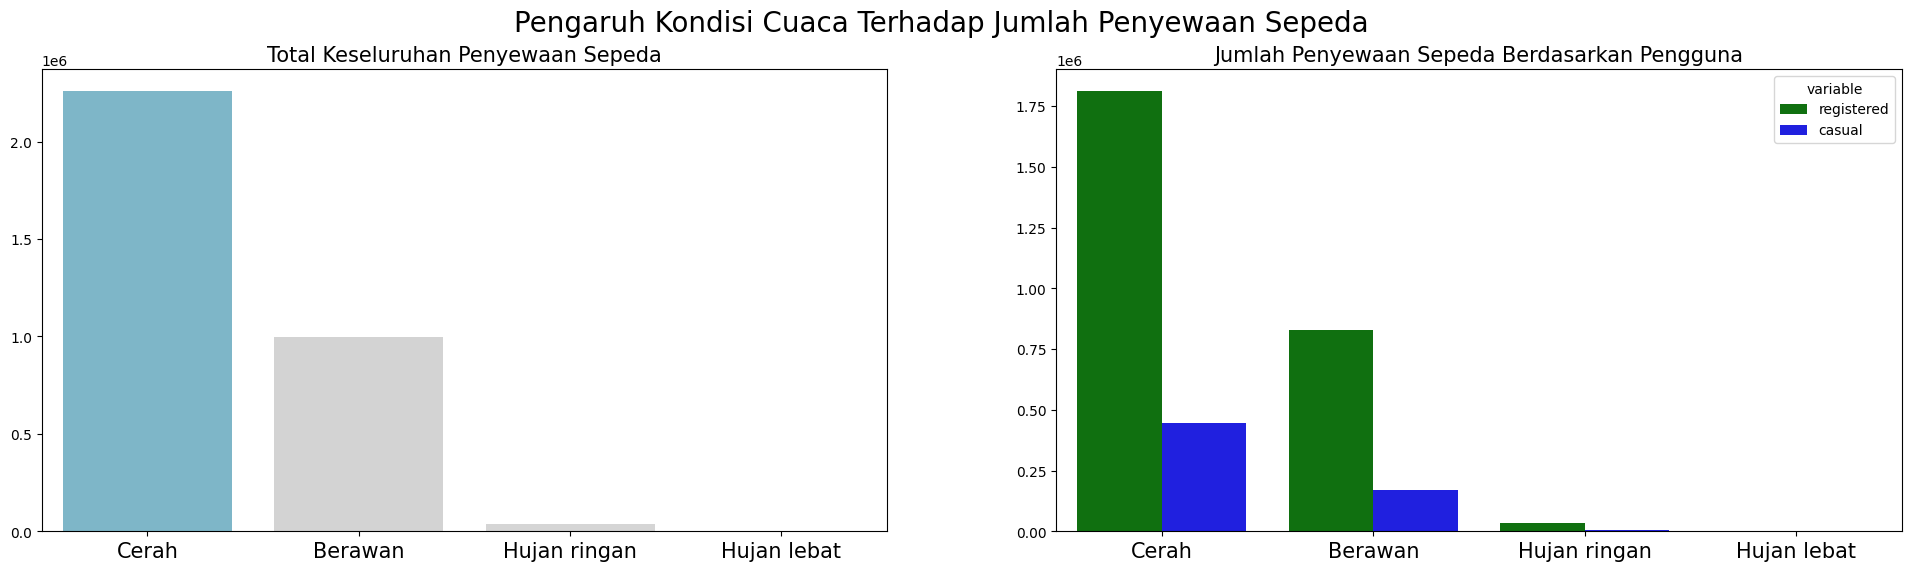

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D5D5D5", "#D3D3D3"]
sns.barplot(x=day_melted.index, y=day_melted['cnt'], palette=colors, ax=ax[0])
ax[0].set_title("Total Keseluruhan Penyewaan Sepeda", loc="center", fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(x='weather_category', y='value', hue='variable',
            data=day_melted[['registered','casual']].reset_index().melt(id_vars=['weather_category']),
            palette=['green', 'blue'], ax=ax[1])

ax[1].set_title("Jumlah Penyewaan Sepeda Berdasarkan Pengguna", loc="center", fontsize=15)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelsize=15)

plt.suptitle("Pengaruh Kondisi Cuaca Terhadap Jumlah Penyewaan Sepeda", fontsize=20)
plt.show()

**Insight:**
* Cuaca berpengaruh besar terhadap jumlah penyewaan sepeda. Semakin buruk cuaca, semakin rendah jumlah penyewaan, pengguna terdaftar (registered) lebih dominan dibandingkan pengguna kasual dalam segala kondisi cuaca, dan peluang bisnis penyewaan sepeda lebih optimal pada hari cerah.

## Analisis Lanjutan (Opsional)

In [17]:
# Hitung mean dan standar deviasi untuk clustering
mean_usage = weekday_usage["cnt"].mean()
std_usage = weekday_usage["cnt"].std()
def categorize_usage(cnt):
    if cnt >= mean_usage + std_usage:
        return "Tinggi"
    elif cnt <= mean_usage - std_usage:
        return "Rendah"
    else:
        return "Sedang"
weekday_usage["cluster"] = weekday_usage["cnt"].apply(categorize_usage)
print(weekday_usage)

  weekday     cnt cluster
0   Sabtu  487790  Tinggi
1   Jumat  485395  Sedang
2  Minggu  477807  Sedang
3   Kamis  473048  Sedang
4    Rabu  469109  Sedang
5  Selasa  455503  Sedang
6   Senin  444027  Rendah


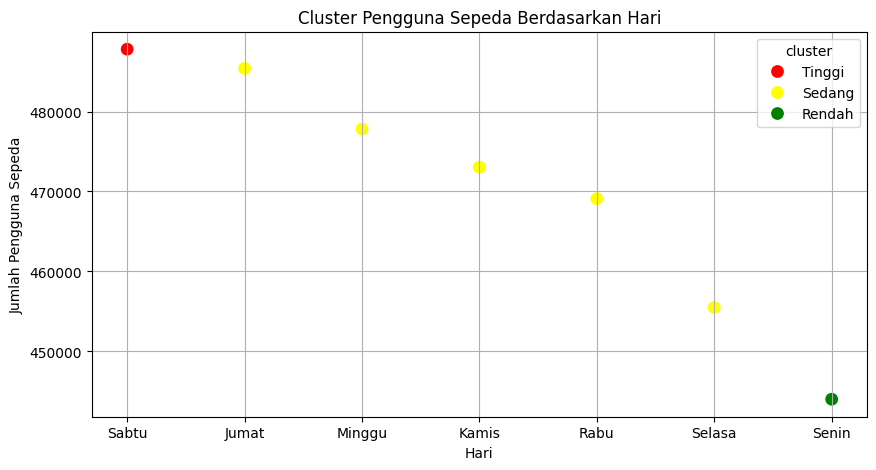

In [18]:
#Melihat cluster menggunakan scatterplot
plt.figure(figsize=(10, 5))
sns.scatterplot(x="weekday", y="cnt", hue="cluster", data=weekday_usage,
                palette={"Tinggi": "red", "Rendah": "green", "Sedang": "yellow"}, s=100)
plt.title("Cluster Pengguna Sepeda Berdasarkan Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.grid(True)
plt.show()

**Insight:**
* Jumlah pengguna sepeda tertinggi terjadi pada hari Sabtu, sedangkan Senin memiliki jumlah pengguna terendah. Tren ini menunjukkan bahwa penggunaan sepeda lebih tinggi pada akhir pekan dibandingkan hari kerja.

## Conclusion

1. Bagaimana pola penggunaan sepeda berdasarkan bulan?
- Plot menunjukkan tren jumlah penyewaan sepeda berdasarkan bulan dari tahun 2011 hingga 2012. Dari grafik, terlihat adanya pola musiman dalam penyewaan sepeda. Pada awal tahun 2011, jumlah penyewaan sepeda relatif rendah, tetapi meningkat signifikan hingga pertengahan tahun, mencapai puncaknya sekitar Mei hingga Juni 2011. Setelah itu, terjadi sedikit penurunan yang berlanjut hingga akhir tahun.

- Memasuki tahun 2012, tren serupa terlihat, dengan peningkatan tajam setelah awal tahun, mencapai puncak tertinggi sekitar bulan September hingga Oktober 2012. Setelah itu, jumlah penyewaan kembali mengalami penurunan yang signifikan menjelang akhir tahun. Pola ini menunjukkan bahwa penyewaan sepeda cenderung meningkat pada musim tertentu, kemungkinan dipengaruhi oleh faktor cuaca atau periode liburan, di mana lebih banyak orang tertarik untuk menggunakan sepeda.

2. Bagaimana perbandingan penyewaan sepeda terbanyak dan tersedikit dalam setiap harinya?
- Plot menunjukkan bahwa penggunaan sepeda tertinggi terjadi pada hari Sabtu, sementara penggunaan terendah terjadi pada hari Senin. Ini mengindikasikan bahwa permintaan sepeda lebih tinggi di akhir pekan, kemungkinan karena aktivitas rekreasi atau waktu luang yang lebih banyak. Sebaliknya, penggunaan sepeda lebih rendah pada awal minggu, yang bisa disebabkan oleh kesibukan kerja atau sekolah. Pola ini dapat menjadi pertimbangan dalam strategi operasional penyewaan sepeda, seperti penyesuaian jumlah sepeda yang tersedia atau promosi khusus pada hari kerja untuk meningkatkan penggunaan.

3. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda, baik untuk pengguna terdaftar (registered) maupun pengguna kasual (casual)?

- Dari kedua plot, terlihat bahwa kondisi cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Pada plot pertama, jumlah penyewaan sepeda tertinggi terjadi saat cuaca cerah, sedangkan saat hujan ringan atau hujan lebat, jumlah penyewaan turun drastis. Hal ini menunjukkan bahwa kondisi cuaca yang buruk sangat membatasi penggunaan sepeda.

- Pada plot kedua, jika dilihat berdasarkan kategori pengguna, baik pengguna terdaftar (registered) maupun pengguna kasual (casual) lebih banyak menyewa sepeda saat cuaca cerah dibandingkan saat berawan atau hujan. Pengguna terdaftar memiliki jumlah penyewaan yang jauh lebih tinggi dibandingkan pengguna kasual dalam semua kondisi cuaca, tetapi penurunan yang signifikan tetap terlihat ketika cuaca memburuk.

- Secara keseluruhan, pola ini mengindikasikan bahwa layanan penyewaan sepeda sangat bergantung pada kondisi cuaca, dengan potensi permintaan yang tinggi saat cuaca cerah dan menurun drastis saat cuaca buruk. Hal ini dapat menjadi pertimbangan dalam strategi operasional, seperti menyediakan fasilitas perlindungan hujan atau insentif khusus saat cuaca kurang mendukung.

In [19]:
day_df.to_csv("all_data.csv", index=False)